In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 9)})
sns.set_style('ticks')


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
FP_SEARCH_RESULTS = 'search_results.csv'
FP_ID_NAMES = 'augmented_clean_names.csv/augmented_clean_names.csv'

In [3]:
usecols = [
 'name1.uniqid',
 'name1.n',
 'name2.uniqid',
 'name2.n',
 'name3.uniqid',
 'name3.n',
 'name4.uniqid',
 'name4.n',
 'name5.uniqid',
 'name5.n',
 'name6.uniqid',
 'name6.n',
 'name7.uniqid',
 'name7.n',
 'name8.uniqid',
 'name8.n',
 'name9.uniqid',
 'name9.n',
 'name10.uniqid',
 'name10.n',
 'name11.uniqid',
 'name11.n',
 'name12.uniqid',
 'name12.n',
 'name13.uniqid',
 'name13.n',
 'name14.uniqid',
 'name14.n',
 'name15.uniqid',
 'name15.n',
 'name16.uniqid',
 'name16.n',
 'name17.uniqid',
 'name17.n',
 'name18.uniqid',
 'name18.n',
 'name19.uniqid',
 'name19.n',
 'name20.uniqid',
 'name20.n',
 'count']

usecols2 = [
 'name1.uniqid',
 'name1.n',
 'name1.match',
 'name1.start',
 'name1.end',
 'name2.uniqid',
 'name2.n',
 'name2.match',
 'name2.start',
 'name2.end',
 'name3.uniqid',
 'name3.n',
 'name3.match',
 'name3.start',
 'name3.end',
 'name4.uniqid',
 'name4.n',
 'name4.match',
 'name4.start',
 'name4.end',
 'name5.uniqid',
 'name5.n',
 'name5.match',
 'name5.start',
 'name5.end',
 'name6.uniqid',
 'name6.n',
 'name6.match',
 'name6.start',
 'name6.end',
 'name7.uniqid',
 'name7.n',
 'name7.match',
 'name7.start',
 'name7.end',
 'name8.uniqid',
 'name8.n',
 'name8.match',
 'name8.start',
 'name8.end',
 'name9.uniqid',
 'name9.n',
 'name9.match',
 'name9.start',
 'name9.end',
 'name10.uniqid',
 'name10.n',
 'name10.match',
 'name10.start',
 'name10.end',
 'name11.uniqid',
 'name11.n',
 'name11.match',
 'name11.start',
 'name11.end',
 'name12.uniqid',
 'name12.n',
 'name12.match',
 'name12.start',
 'name12.end',
 'name13.uniqid',
 'name13.n',
 'name13.match',
 'name13.start',
 'name13.end',
 'name14.uniqid',
 'name14.n',
 'name14.match',
 'name14.start',
 'name14.end',
 'name15.uniqid',
 'name15.n',
 'name15.match',
 'name15.start',
 'name15.end',
 'name16.uniqid',
 'name16.n',
 'name16.match',
 'name16.start',
 'name16.end',
 'name17.uniqid',
 'name17.n',
 'name17.match',
 'name17.start',
 'name17.end',
 'name18.uniqid',
 'name18.n',
 'name18.match',
 'name18.start',
 'name18.end',
 'name19.uniqid',
 'name19.n',
 'name19.match',
 'name19.start',
 'name19.end',
 'name20.uniqid',
 'name20.n',
 'name20.match',
 'name20.start',
 'name20.end',
 'count']

### Merge search results back to Ideo

In [4]:
# Read in 
df_search_results = (pd.read_csv(FP_SEARCH_RESULTS, usecols=usecols2)
                     .query('count>0')
                    )

In [5]:
# Process search results and return df with uniqid and citation counts
id_vars = [col for col in df_search_results if col.endswith('.uniqid')]
value_vars = [col for col in df_search_results if col.endswith('.n')]
id_val_tuples = zip(id_vars, value_vars)

df = pd.DataFrame()

for tuple in id_val_tuples:
    uniqid, citations = tuple
    
    _df = (df_search_results[[uniqid, citations]]
           .pipe(lambda dataframe: dataframe[dataframe[uniqid].notnull()])
           .rename(columns={uniqid:'uniqid', citations: 'citations'})
          )
    
    df = (df.append(_df, ignore_index=True)
          .astype({'uniqid': int, 'citations': int})
          .groupby('uniqid').sum().reset_index()
         )
    
df.head(3)

,uniqid,citations
0,1,2
1,3,4
2,24,1


In [6]:
# Merge out_df with the DIME data via augmented_clean_names [list of names to search with ideo scores]
df = (df.merge(pd.read_csv(FP_ID_NAMES), 
              how='right', on='uniqid', validate='1:1')
      .sort_values('citations', ascending=False)
     )

df.head(5)

,uniqid,citations,election,cycle,fecyear,Cand.ID,FEC.ID,NID,ICPSR,ICPSR2,bonica.rid,bonica.cid,Name,LastName,ffname,FirstName,MiddleInitial/Name,NickName,Title,Suffix,party,state,seat,district,Incum.Chall,recipient.cfscore,contributor.cfscore,recipient.cfscore.dyn,dwnom1,dwnom2,ps.dwnom1,ps.dwnom2,dwdime,irt.cfscore,num.givers,num.givers.total,n.data.points.personal.donations,n.data.points.personal.donations.unq,cand.gender,total.disbursements,total.pc.contribs,contribs.from.candidate,unitemized,non.party.ind.exp.for,non.party.ind.exp.against,ind.exp.for,ind.exp.against,comm.cost.for,comm.cost.against,party.coord.exp,party.ind.exp.against,total.receipts,total.indiv.contrib,total.pac.contribs,ran.primary,ran.general,p.elec.stat,s.elec.stat,r.elec.stat,gen.elec.stat,gen.elect.pct,winner,district.partisanship,district.pres.vs,candStatus,recipient.type,igcat,comtype,nimsp.party,nimsp.candidate.ICO.code,nimsp.district,nimsp.office,nimsp.candidate.status,before.switch.ICPSR,after.switch.ICPSR,party.orig,prefixes,nick_names
69490,69490,2953.0,WY1998,1998,1998.0,WY136619,NaN,NaN,WY1366191998,WY136619,cand119514,3.944967e+09,"lee, ed",lee,ed,ed,NaN,NaN,NaN,NaN,100,WY,state:lower,WY-54,I,-1.417,-1.375,-1.316,NaN,NaN,NaN,NaN,NaN,NaN,18.0,25,0,0,M,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5273.0,4553.0,465.0,1.0,1.0,W,NaN,NaN,L,NaN,L,NaN,NaN,NaN,cand,NaN,NaN,DEMOCRAT,I,054,HOUSE,Lost - General Election,NaN,NaN,100,NaN,NaN
105412,105412,2876.0,WI2004,2004,2004.0,WI128222,NaN,NaN,WI1282222004,WI128222,cand117171,4.894256e+09,"priebus, reince",priebus,reince,reince,NaN,NaN,NaN,NaN,200,WI,state:upper,WI-22,C,1.113,1.247,1.113,NaN,NaN,NaN,NaN,0.513,NaN,1026.0,1026,108,108,U,0.0,6900.0,34870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,352231.0,294871.0,11265.0,1.0,1.0,W,NaN,NaN,L,NaN,L,NaN,NaN,NaN,cand,NaN,NaN,REPUBLICAN,C,022,SENATE,Lost - General Election,NaN,NaN,200,NaN,NaN
132431,132431,1803.0,NJ2010,2010,2010.0,NJ90695,NaN,NaN,NJ906952010,NJ90695,cand82171,4.417746e+09,"christie, chris & guadagno, kim",christie,chris & guadagno,chris & guadagno,NaN,NaN,NaN,NaN,200,NJ,state:governor,NaN,C,0.540,0.484,0.558,NaN,NaN,NaN,NaN,0.212,NaN,3678.0,3678,56,56,M,0.0,35616.0,11110.0,73339.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16258326.0,4955499.0,690751.0,1.0,1.0,W,NaN,NaN,W,NaN,W,NaN,NaN,NaN,cand,NaN,NaN,REPUBLICAN,C,SW,GOVERNOR / LIEUTENANT GOVERNOR,Won,NaN,NaN,200,governor;candidate,NaN
101383,101383,1735.0,NV2004,2004,2004.0,NV93905,NaN,NaN,NV939052004,H4NV02086,cand47859,3.822464e+09,"jefferson, thomas",jefferson,thomas,thomas,NaN,NaN,NaN,NaN,328,NV,state:upper,NaN,C,2.169,1.994,2.135,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3,0,0,M,0.0,0.0,2426.0,1990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5486.0,1070.0,0.0,1.0,1.0,W,NaN,NaN,L,NaN,L,NaN,NaN,NaN,cand,NaN,NaN,INDEPENDENT AMERICAN,C,NORTHERN NEVADA,SENATE,Lost - General Election,NaN,NaN,328,NaN,NaN
75936,75936,1676.0,NE2000,2000,2000.0,NE84433,NaN,NaN,NE844332000,NE84433,cand80271,NaN,"kelly, bob",kelly,bob,bob,NaN,NaN,NaN,NaN,328,NE,state:upper,NE-9,O,-0.549,NaN,-0.497,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5,0,0,M,0.0,459.0,281.0,8625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17688.0,0.0,8250.0,1.0,0.0,L,NaN,NaN,L,NaN,L,NaN,NaN,NaN,cand,NaN,NaN,NONPARTISAN,O,009,SENATE,Lost - Primary Election,NaN,NaN,328,NaN,NaN


### Try plotting top 50 politicians

Text(0, 0.5, '')

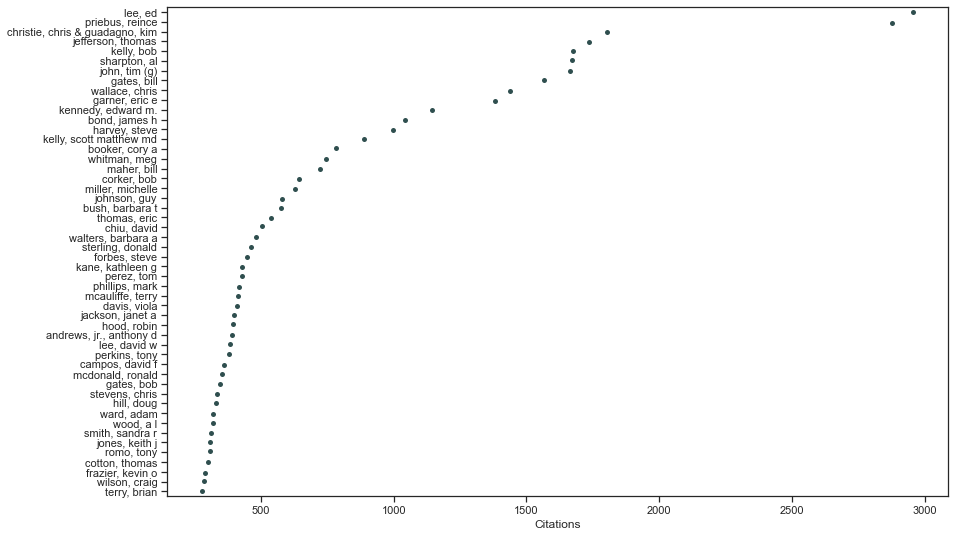

In [7]:
sns.stripplot(x='citations', y='Name', data=df.head(50), 
              orient='h', color='darkslategray')

plt.xlabel('Citations')
plt.ylabel('')